# Proyek UAS Kecerdasan Buatan - IBDA2032

Anggota Kelompok:
1. Badia Sihaloho - 10101190602
2. Christyane Zabdi - 10101190118
3. Jabez Joeniko - 10101200141

# Tugas 01 - Computer Vision

Dalam rangka memperketat sistem pengawasan protokol kesehatan yang sudah ada selama pandemi COVID-19 untuk mengurangi penyebaran kasus, kami membuat sebuah model yang dapat mengklasifikasikan apakah murid CIT menggunakan masker atau tidak berdasarkan foto. Data untuk pelatihan model ini kami dapatkan dari https://www.kaggle.com/omkargurav/face-mask-dataset. Model ini menggunakan metode permodelan <em>convolutional neural network</em> dengan arsitektur (jumlah neuron, hidden layer, fungsi aktivasi, loss function, metrics, dkk) yang kami tentukan sendiri. Data test yang kami gunakan merupakan data test yang kami kumpulkan dari seluruh peserta kelas AI-IBDA2032 pada link https://drive.google.com/drive/folders/1OFIjWp-NfZcxJ-Fg25uR7-DV5_otiH1b?usp=sharing. 

In [ ]:
# Import semua modul yang diperlukan
from keras.losses import SparseCategoricalCrossentropy, BinaryCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers import Softmax
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
# import cv2 
# import glob 
import tensorflow as tf
import itertools
from sklearn.metrics import confusion_matrix
from keras import callbacks
import time
import math

In [ ]:
# Menghubungkan ke google drive untuk mempermudah akses data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !unzip -uq "/content/drive/My Drive/archive" -d "/content/drive/My Drive/data"

## Mempersiapkan Data

Dalam mempersiapkan data, kami memasukkan data yang kami dapatkan ke dalam google drive untuk mempermudah akses dari data-data tersebut. Setelah itu, kami akan menyimpan data tersebut untuk melakukan pelatihan. Kami menggunakan ImageDataGenerator untuk mengkodekan gambar sehingga berbentuk matriks yang siap untuk digunakan. Fungsi <em>rescale</em> yang kami gunakan adalah karena skema warna yang digunakan adalah RGB dengan skala 0-255. Hal ini kami lakukan supaya rentang angka dari matriksnya dapat diperkecil dan mempermudah proses pelatihan data.

In [ ]:
train = ImageDataGenerator(rescale=1/255, validation_split=0.10)
test = ImageDataGenerator(rescale=1/255)

In [ ]:
train_dataset = train.flow_from_directory('/content/drive/My Drive/data/data',
                                          # color_mode="grayscale",
                                          target_size=(32,32),
                                          batch_size=32,
                                          class_mode='binary',
                                          subset='training')
validation_dataset = train.flow_from_directory('/content/drive/My Drive/data/data',
                                              #  color_mode="grayscale",
                                               target_size=(32,32),
                                               batch_size=32,
                                               class_mode='binary',
                                               subset='validation')
test_dataset = test.flow_from_directory('/content/drive/My Drive/Foto Training Computer Vision UAS',
                                        # color_mode="grayscale",
                                        target_size=(32,32),
                                        batch_size=32,
                                        class_mode='binary')

Found 6799 images belonging to 2 classes.
Found 754 images belonging to 2 classes.
Found 23 images belonging to 2 classes.


In [ ]:
# data= train.flow_from_directory('/content/drive/My Drive/data/data',
#                                 target_size=(32,32),
#                                 batch_size=32,
#                                 class_mode='binary', )

In [ ]:
# Cek class dari data train
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
# Cek jumlah kelas yang ada pada data train
train_dataset.class_indices

{'with_mask': 0, 'without_mask': 1}

In [ ]:
train_dataset.batch_size

32

In [ ]:
# Cek class dari data pelatihan
validation_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Cek jumlah kelas yang ada pada data train
validation_dataset.class_indices

{'with_mask': 0, 'without_mask': 1}

In [ ]:
validation_dataset.batch_size

32

In [ ]:
validation_dataset.samples//validation_dataset.batch_size

23

In [ ]:
# Cek shape dari data test
validation_dataset.image_shape

(32, 32, 3)

In [ ]:
# Cek jumlah sample dari data train
train_dataset.samples

6799

In [ ]:
# Cek jumlah sample dari data validasi (data pengujian)
validation_dataset.samples

754

In [ ]:
class_labels = ["with_mask", "without_mask"]

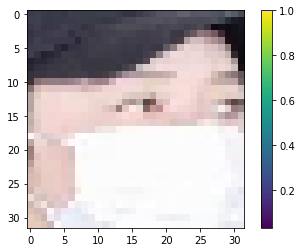

In [ ]:
# Visualisasi data latih yang pertama
plt.figure()
plt.imshow(tf.squeeze(train_dataset[0][0][0]))
plt.colorbar()
plt.grid(False)
plt.show()

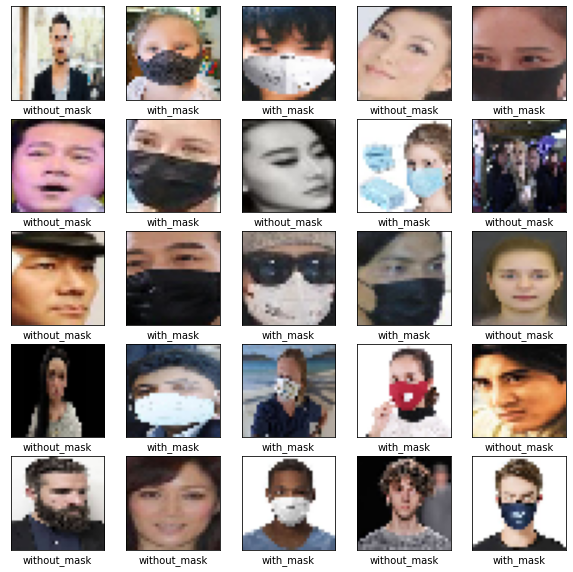

In [ ]:
# Membuat visualisasi 25 dati latih pertama
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(tf.squeeze(train_dataset[1][0][i]), cmap=plt.cm.binary)
    plt.xlabel(class_labels[int(list(train_dataset[1][1])[i])])
plt.show()

## Pelatihan Model
 
Dalam melakukan pelatihan model, kami menggunakan arsitektur sebagai berikut:
1. Jumlah input: --
2. Jumlah neuron: 100
3. Jumlah hidden layer: 2
4. Jumlah Output: 2
5. Fungsi aktivasi: pada hidden layer=relu, pada output=sigmoid
6. Loss function: SparseCategoricalCrossentropy()
7. Metrics: accuracy

Dalam pelatihan, tentunya kita perlu mengetahui, jumlah penggunaan <em>epoch</em> yang sesuai agar pelatihan tidak menjadi <em>overfitting</em>. Dalam pelatihan kali ini, kami menerapkan metode <em>Early Stopping</em> dan juga menyimpan model (<em>Model Checkpoint</em>) yang ditemukan paling bagus nilai <em>val_accuracy</em>-nya. <em>Early Stopping</em> ini akan menunggu nilai <em>val_accuracy</em>-nya mencapai titik terbaik. Sedangkan <em>Model Checkpoint</em> akan menyimpan model yang memiliii nilai <em>val_accuracy</em>-nya paling tinggi selama pelatihan berlangsung. Jika dirasa sudah tidak bisa menjadi lebih tinggi, maka <em>Early Stopping</em> akan menghentikan latihan sehingga tidak memakan waktu terlalu lama. Hal ini tentunya mempermudah kami dalam menentukan berapa jumlah epoch yang terbaik selama pelatihan model.

In [ ]:
# Pembuatan model
model = Sequential([
    Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'),
    Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(2, activation='sigmoid')
])

In [ ]:
# initial_learning_rate = 0.1
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate,
#     decay_steps=100000,
#     decay_rate=0.5,
#     staircase=False)

In [ ]:
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:

# simple early stopping, 
es = callbacks.EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=7)
mc = callbacks.ModelCheckpoint('best_model.h', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# Memulai penghitungan waktu
start_time = time.time()
start_time

1622882989.684101

In [ ]:
# Pelatihan model
history = model.fit(train_dataset,
                    steps_per_epoch=(train_dataset.samples//train_dataset.batch_size)*2,
                    validation_data=validation_dataset,
                    validation_steps=(validation_dataset.samples//validation_dataset.batch_size)*2,
                    epochs=20,
                    callbacks=[es, mc])

Epoch 1/20
122/424 [=======>......................] - ETA: 58s - loss: 0.4869 - accuracy: 0.7605

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


424/424 [==============================] - 113s 215ms/step - loss: 0.3648 - accuracy: 0.8352 - val_loss: 0.1399 - val_accuracy: 0.9458

Epoch 00001: val_accuracy improved from -inf to 0.94582, saving model to best_model.h
INFO:tensorflow:Assets written to: best_model.h/assets
Epoch 2/20
 91/424 [=====>........................] - ETA: 1:06 - loss: 0.1550 - accuracy: 0.9403

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


424/424 [==============================] - 91s 215ms/step - loss: 0.1532 - accuracy: 0.9406 - val_loss: 0.1025 - val_accuracy: 0.9640

Epoch 00002: val_accuracy improved from 0.94582 to 0.96399, saving model to best_model.h
INFO:tensorflow:Assets written to: best_model.h/assets
Epoch 3/20
 92/424 [=====>........................] - ETA: 1:07 - loss: 0.0822 - accuracy: 0.9697

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


424/424 [==============================] - 92s 217ms/step - loss: 0.0815 - accuracy: 0.9699 - val_loss: 0.1366 - val_accuracy: 0.9681

Epoch 00003: val_accuracy improved from 0.96399 to 0.96814, saving model to best_model.h
INFO:tensorflow:Assets written to: best_model.h/assets
Epoch 4/20
 98/424 [=====>........................] - ETA: 1:08 - loss: 0.0321 - accuracy: 0.9945

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


424/424 [==============================] - 91s 215ms/step - loss: 0.0335 - accuracy: 0.9911 - val_loss: 0.1326 - val_accuracy: 0.9598

Epoch 00004: val_accuracy did not improve from 0.96814
Epoch 5/20
424/424 [==============================] - 92s 217ms/step - loss: 0.0202 - accuracy: 0.9929 - val_loss: 0.1211 - val_accuracy: 0.9619

Epoch 00005: val_accuracy did not improve from 0.96814
Epoch 6/20
424/424 [==============================] - 90s 213ms/step - loss: 0.0173 - accuracy: 0.9939 - val_loss: 0.1208 - val_accuracy: 0.9778

Epoch 00006: val_accuracy improved from 0.96814 to 0.97784, saving model to best_model.h
INFO:tensorflow:Assets written to: best_model.h/assets
Epoch 7/20
 87/424 [=====>........................] - ETA: 1:09 - loss: 0.0161 - accuracy: 0.9981

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


424/424 [==============================] - 90s 213ms/step - loss: 0.0304 - accuracy: 0.9914 - val_loss: 0.1487 - val_accuracy: 0.9723

Epoch 00007: val_accuracy did not improve from 0.97784
Epoch 8/20
424/424 [==============================] - 91s 215ms/step - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.1565 - val_accuracy: 0.9799

Epoch 00008: val_accuracy improved from 0.97784 to 0.97992, saving model to best_model.h
INFO:tensorflow:Assets written to: best_model.h/assets
Epoch 9/20
 93/424 [=====>........................] - ETA: 1:06 - loss: 0.0052 - accuracy: 0.9971

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


424/424 [==============================] - 90s 213ms/step - loss: 0.0137 - accuracy: 0.9945 - val_loss: 0.1374 - val_accuracy: 0.9765

Epoch 00009: val_accuracy did not improve from 0.97992
Epoch 10/20
424/424 [==============================] - 91s 214ms/step - loss: 0.0086 - accuracy: 0.9966 - val_loss: 0.1062 - val_accuracy: 0.9799

Epoch 00010: val_accuracy did not improve from 0.97992
Epoch 11/20
424/424 [==============================] - 87s 206ms/step - loss: 0.0087 - accuracy: 0.9973 - val_loss: 0.2074 - val_accuracy: 0.9515

Epoch 00011: val_accuracy did not improve from 0.97992
Epoch 12/20
424/424 [==============================] - 86s 204ms/step - loss: 0.0069 - accuracy: 0.9976 - val_loss: 0.1856 - val_accuracy: 0.9695

Epoch 00012: val_accuracy did not improve from 0.97992
Epoch 13/20
424/424 [==============================] - 91s 214ms/step - loss: 0.0022 - accuracy: 0.9995 - val_loss: 0.1167 - val_accuracy: 0.9737

Epoch 00013: val_accuracy did not improve from 0.97992
Ep

In [ ]:
# waktu yang diperlukan untuk pelatihan model dalam satuan menit. 
time_required = (time.time() - start_time) // 60
time_required

23.0

In [ ]:
# Menyimpan nilai yang ada pada model
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

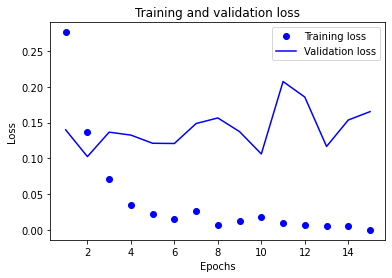

In [ ]:
# Membuat grafik tentang nilai loss dan val_loss pada model
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

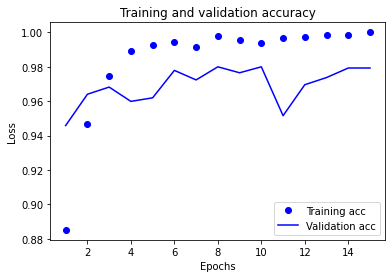

In [ ]:
# Membuat grafik tentang nilai accuracy dan val_accuracy pada model
plt.clf()

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

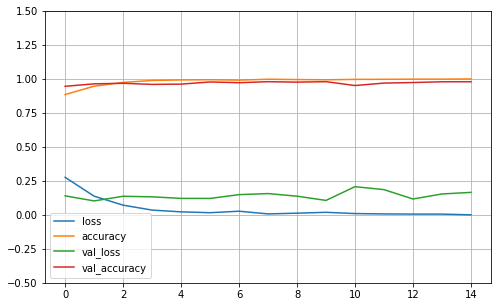

In [ ]:
# Membuat grafik keseluruhan nilai yang terkait pada model
history = pd.DataFrame(history.history)
history.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(-0.5, 1.5)
plt.show()

Dalam pelatihan model diatas, dapat kita lihat bahwa pelatihan model yang kami lakukan membutuhkan waktu cukup singkat yaitu kurang lebih sekitar 20-30 menit jika kecepatan internet cukup stabil dan dapat lebih dari satu jam jika kecepatan internet tidak stabil. Selain itu, kami mendapatkan nilai keakuratan (accuracy) yang tinggi yaitu 100% dan nilai val_accuracy yang sedikit lebih rendah dari pada accuracy yaitu 97,299%. Setelah melakukan pelatihan model, maka kami melakukan pengujian dengan data yang kami dapatkan dibawah ini. Pada pelatihan model diatas, kami juga melakukan plotting data accuracy setiap epoch yang kami dapatkan pada pelatihan model tersebut. Kami mendapat bahwa jumlah epoch yang paling baik adalah pelatihan dengan kurang lebih 11-14 jumlah epoch. Hal ini dapat bertambah maupun berkurang bergantung dari situasi dan kondisi pada saat pelatihan. <br>

Dapat kita lihat diatas bahwa nilai val_accuracy yang cenderung stabil dari awal sampai akhir dan hanya meningkat sedikit demi sedikit. Untuk nilai accuracy dari model yang telah kami buat, pada akhir pelatihan memiliki nilai yang stabil yaitu 1.00. (sepertinya paragraf ini ga gitu penting karena dari grafik dan pemaparan pada model.fit sudah jelas)

## Predictions Testing


In [ ]:
# Ringkasan dari model yang telah dilatih
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, None, None, 32)    896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 32)    9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, None, None, 32)    0         
_________________________________________________________________
flatten (Flatten)            (None, None)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               627300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2

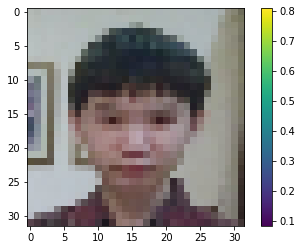

In [ ]:
# Visualisasi data test pertama
plt.figure()
plt.imshow(tf.squeeze(test_dataset[0][0][0]))
plt.colorbar()
plt.grid(False)
plt.show()

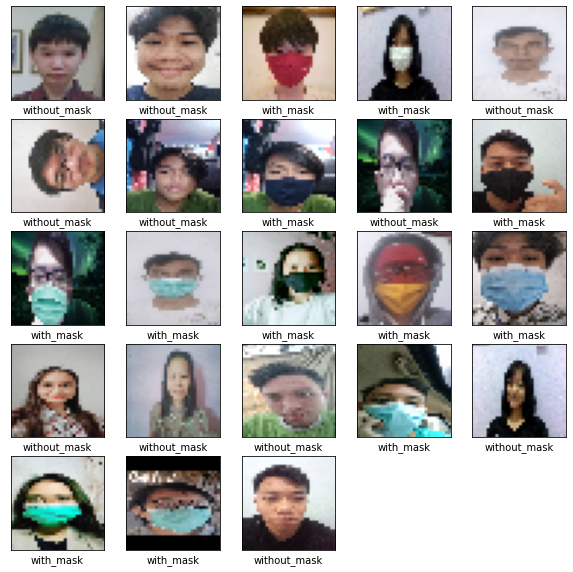

In [ ]:
# Visualisasi semua data test yang akan diuji
plt.figure(figsize=(10,10))
for i in range(23):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_dataset[0][0][i], cmap=plt.cm.binary)
    plt.xlabel(class_labels[int(list(test_dataset[0][1])[i])])
plt.show()

In [ ]:
# Membuat prediksi mengenai data test
prediction = model.predict(test_dataset[0][0])

In [ ]:
# Melihat prediksi data test pertama
prediction[0]

array([0.01641363, 0.98902166], dtype=float32)

In [ ]:
# Melihat hasil prediksi sebenarnya dari prediction array diatas
np.argmax(prediction[0])

1

In [ ]:
# Mencocokkan nilai prediksi dan label
int(test_dataset[0][1][0])

1

In [ ]:
# Membuat test_label menjadi type int32 --> belum tentu kepake si, nanti kalo beneran ga kepake hapus aja
number_of_examples = len(test_dataset.filenames)
number_of_generator_calls = math.ceil(number_of_examples / (1.0 * test_dataset.batch_size)) 
# 1.0 above is to skip integer division

test_labels = []

for i in range(0,int(number_of_generator_calls)):
    test_labels.extend(np.array(test_dataset[i][1]).astype('int32'))

In [ ]:
# Deklarasikan fungsi untuk melakukan visualisasi gambar yang akan membantu kita di dalam memahami dari nilai prediksi
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], tf.squeeze(img[i])
    # true_label, img = true_label[i], img
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == int(true_label):
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_labels[predicted_label],
                                  100*np.max(predictions_array),
                                  class_labels[int(true_label)]),
                                  color=color)
    # plt.xlabel(class_labels[np.argmax(test_labels[i])])

def plot_value_array(i, predictions_array, true_label):
    # true_label = true_label[i][0]
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(2), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[int(true_label)].set_color('blue')

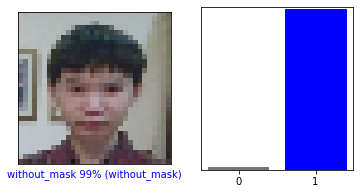

In [ ]:
# Visualisasi prediksi data test pertama
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_dataset[0][1], test_dataset[0][0])
plt.subplot(1,2,2)
plot_value_array(i, prediction[i], test_labels)
plt.show()

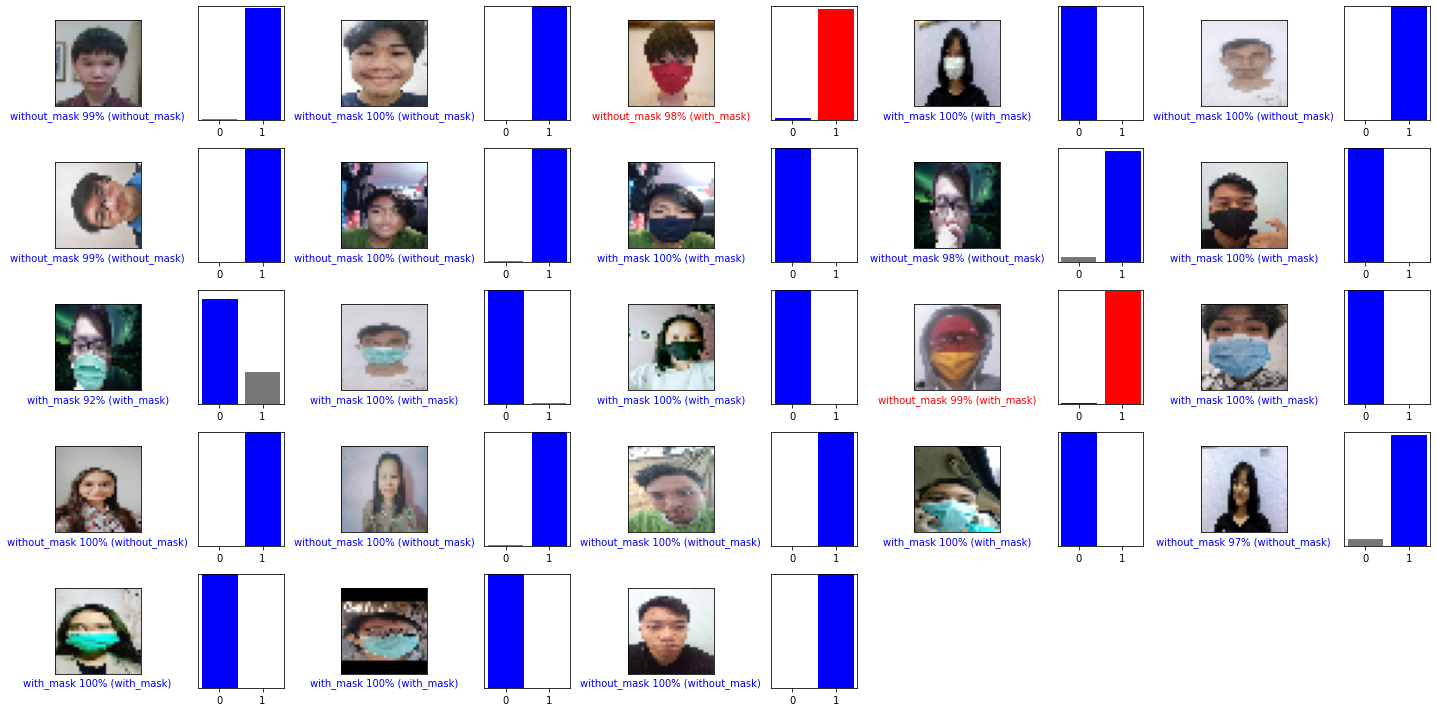

In [ ]:
# Visualisasi semua data test beserta hasil prediksinya
num_rows = 5
num_cols = 5
difference = num_rows * num_cols - test_dataset.samples
num_images = num_rows*num_cols - difference
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction[i], test_dataset[0][1], test_dataset[0][0])
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction[i], test_dataset[0][1])
plt.tight_layout()
plt.show()

## Confusion Matrix

Dibawah ini, kami membuat confusion matrix untuk melihat apakah model yang kami latih ini sudah baik atau belum. Untuk membuat confusion matrix kali ini, kami menggunakan sklearn.metrics dengan membandingkan hasil prediksi dari data yang telah diuji dengan kelas yang seharusnya dari data test. 

In [ ]:
# Cek prediction array
prediction

array([[1.6413629e-02, 9.8902166e-01],
       [2.3216826e-05, 9.9998164e-01],
       [2.4031073e-02, 9.8078513e-01],
       [1.0000000e+00, 2.1722609e-07],
       [3.7565827e-04, 9.9968278e-01],
       [6.5447390e-03, 9.9350148e-01],
       [1.4920682e-02, 9.9718308e-01],
       [9.9996650e-01, 6.1485171e-04],
       [4.5084447e-02, 9.7919559e-01],
       [9.9999881e-01, 5.3447533e-05],
       [9.1966581e-01, 2.8415239e-01],
       [9.9872851e-01, 9.5333755e-03],
       [9.9999452e-01, 1.0331592e-04],
       [8.8044405e-03, 9.9210727e-01],
       [1.0000000e+00, 8.9627996e-08],
       [3.4206498e-06, 9.9999738e-01],
       [4.2000115e-03, 9.9611688e-01],
       [9.3019009e-04, 9.9923712e-01],
       [9.9999440e-01, 2.2378564e-04],
       [6.2558681e-02, 9.7329038e-01],
       [1.0000000e+00, 1.3619301e-11],
       [9.9999970e-01, 1.0695227e-05],
       [4.6483692e-07, 9.9999952e-01]], dtype=float32)

In [ ]:
# Mengubah prediction array menjadi nilai prediksi
prediction_labels = []
for _ in range(len(prediction)):
  prediction_labels.append(np.argmax(prediction[_]))
prediction_labels

[1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1]

In [ ]:
# nanti kalo sudah selesai cell ini hapus aja
len(test_dataset[0][1]), len(prediction_labels), test_dataset[0][1], prediction_labels

(23,
 23,
 array([1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
        1., 0., 1., 0., 0., 1.], dtype=float32),
 [1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1])

In [ ]:
# [0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0]
# [1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1]

In [ ]:
# Membuat confusion matrix
cm=confusion_matrix(test_dataset[0][1], prediction_labels)
print(cm)

[[10  2]
 [ 0 11]]


In [ ]:
# Mendapatkan urutan nilai True Negatif, False Positif, False Negatif, dan True Positif pada confusion matrix
tn, fp, fn, tp = cm.ravel()
tn, fp, fn, tp

(10, 2, 0, 11)

In [ ]:
# Fungsi ini untuk membuat plot dari confusion matrix
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    print('Confusion matrix')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# Membuat list untuk plotting confusion matrix
cm_plot_labels = ['with_mask','without_mask']

In [ ]:
precision = (tp/(tp+fp))*100
negative_predictive_value = tn/(tn+fn)
sensitivity = (tp/(tp+fn))*100
specificity = (tn/(tn+fp))*100
accuracy = ((tp+tn)/(tp+tn+fp+fn))*100

In [ ]:
# Melihat beberapa nilai penting model jika dilihat dari confusion matrix
print("Model Precision: ", precision)
print("Negative Predicitive Value of Model: ", negative_predictive_value)
print("Model Sensitivity: ", sensitivity)
print("Model Spesificity: ", specificity)
print("Model Accuracy: ", accuracy)

Model Precision:  84.61538461538461
Negative Predicitive Value of Model:  1.0
Model Sensitivity:  100.0
Model Spesificity:  83.33333333333334
Model Accuracy:  91.30434782608695


Confusion matrix
[[10  2]
 [ 0 11]]


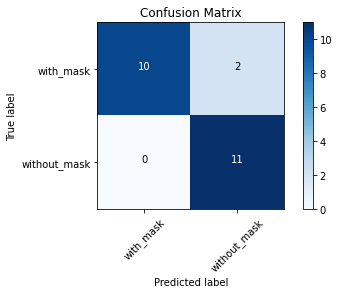

In [ ]:
# Visualisasi confusion matrix
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

Dalam plot confusion matrix yang telah kami buat, dapat kita lihat bahwa terdapat 10 data with_mask yang benar diprediksi sebagai gambar orang yang memakai masker. Kemudian, terdapat 2 data yang salah diprediksi dan juga 11 data lagi yang benar terprediksi sebagai data without_mask. Hal ini menunjukkan bahwa model kami cukup akurat. Hal ini dikarenakan hampir semua gambarnya di prediksi dengan tepat. Terkadang, kami juga mendapati hanya satu model yang salah ketika di prediksi data test, namun di kesempatan lain, kami juga mendapatkan 3 kesalahan, sehingga rata-rata kesalahan yang didapat adalah 2 data. Dalam confusion matrix ini, kami rasa semua parameter sangat penting untuk model kami. Hal ini dikarenakan confusion matrix dapat dengan mudah memetakan seberapa akurat data kami ketika melakukan prediksi. Dapat kita lihat diatas bahwa dapat dengan mudah kita menemukan 10 data with_mask di deteksi sebagai data with_mask. 

# Tugas 02 - Natural Language Processing
Untuk tugas 2 UAS AI mengenai NLP, kami memilih topik yang berdekatan isu hangat yang baru-baru ini terjadi di India, yaitu covid india. Kami memilih topik ini karena sering muncul di berita bahwa ganasnya wabah covid yang terjadi di India, memakan sangat banyak korban. Bahkan dilansir dari berita salah satu stasiun televisi, oksigen menjadi barang langka disana yang sama berharganya dengan emas. Petugas rumah sakit juga mengalami hari yang sangat berat karena hampir tiap waktu harus menangani pasien yang masuk tidak henti-hentinya. Bahkan pasien harus menunggu di halaman rumah sakit karena banyaknya yang terjangkit wabah ini. Termasuk juga untuk korban yang harus dikremasi yang datang silih berganti, bahkan harus menunggu satu harian agar saudara/keluarganya dapat dikremasi karena harus mengantri giliran.


## Mempersiapkan NLP

In [ ]:
!pip install langdetect

     |████████████████████████████████| 983kB 32.0MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-cp37-none-any.whl size=993242 sha256=f098153848c5ba71c448d0c9eb9e7a10b2a02c759074b4b29eab508ebcb91d2b
  Stored in directory: /root/.cache/pip/wheels/7e/18/13/038c34057808931c7ddc6c92d3aa015cf1a498df5a70268996
Successfully built langdetect


In [ ]:
# Import Libraries
from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
# Authentication
consumerKey = '398CFhjDeUtvqr5hTst0Mj6Zb'
consumerSecret ='xwBhnGYvyLkWjL3vIShGTSa1dPbWxk28dUxswDiaL6q88v6pJu'
accessToken = '1393937049917399040-onzgrEzq28abboUAGJ49Pq80yCgRlz'
accessTokenSecret = 'Y0vNc4FKtONCgGOQCbYjvKYz9f3kSWVtLBqVFTWh5rVxj'
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

## Mempersiapkan dan Mengolah Data

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
#Sentiment Analysis
def percentage(part,whole):
 return 100 * float(part)/float(whole)
keyword = input('Please enter keyword or hashtag to search: ')
noOfTweet = int(input ('Please enter how many tweets to analyze: '))
#tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
tweets = api.search(q=keyword, count = noOfTweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
for tweet in tweets:
 
 #print(tweet.text)
 tweet_list.append(tweet.text)
 analysis = TextBlob(tweet.text)
 score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 polarity += analysis.sentiment.polarity
 
 if neg > pos:
     negative_list.append(tweet.text)
     negative += 1
 elif pos > neg:
     positive_list.append(tweet.text)
     positive += 1
 
 elif pos == neg:
     neutral_list.append(tweet.text)
     neutral += 1
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: covid india
Please enter how many tweets to analyze: 100


In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print('total number: ',len(tweet_list))
print('positive number: ',len(positive_list))
print('negative number: ', len(negative_list))
print('neutral number: ',len(neutral_list))

total number:  100
positive number:  32
negative number:  26
neutral number:  42


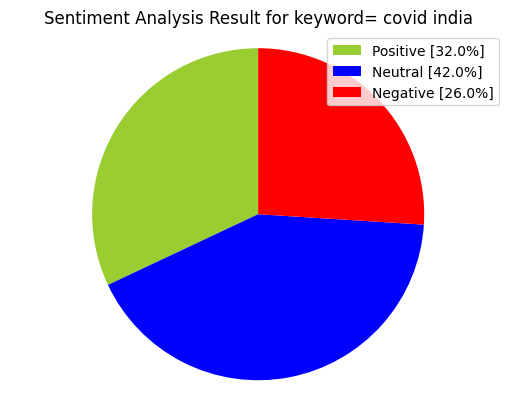

In [ ]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Sentiment Analysis Result for keyword= '+keyword+'' )
plt.axis('equal')
plt.show()

In [ ]:
tweet_list

,0
0,RT @AdamPrabata: BAD NEWS!!\n\nVarian virus pe...
1,#TreatRailwayEmployeesFrontlineWorkers\nIn thi...
2,RT @yaneerbaryam: Why these 2 counties' COVID ...
3,RT @WSJ: A 26-year-old doctor died the same da...
4,RT @Ujjwal_Patni: Watch the Trailer now !!\nक्...
...,...
95,RT @yaneerbaryam: Why these 2 counties' COVID ...
96,How a posh society in Greater Noida arranged #...
97,RT @EconomicTimes: Despite being a 'corona war...
98,Covid cases falling twice as fast in north Ind...


In [ ]:
tweet_list.drop_duplicates(inplace = True)

In [ ]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list['text'] = tw_list[0]
#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: ','',x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ",x)
tw_list['text'] = tw_list.text.map(remove_rt).map(rt)
tw_list['text'] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @AdamPrabata: BAD NEWS!!\n\nVarian virus pe...,bad news varian virus penyebab covid b 1 61...
1,#TreatRailwayEmployeesFrontlineWorkers\nIn thi...,treatrailwayemployeesfrontlineworkers in this...
2,RT @yaneerbaryam: Why these 2 counties' COVID ...,why these 2 counties covid surges are among w...
3,RT @WSJ: A 26-year-old doctor died the same da...,a 26 year old doctor died the same day he was ...
4,RT @Ujjwal_Patni: Watch the Trailer now !!\nक्...,watch the trailer now ...
5,RT @VincentRK: But it's not just steroids that...,but it s not just steroids that the guidelines...
7,RT @biharfoundation: Thank you @amb_tashkent f...,thank you tashkent for your generous support...
8,RT @PSampathkumarMD: Comprehensive guidelines ...,comprehensive guidelines for covid evidence ...
9,RT @Urban_Chanakya: The courts of India and it...,the courts of india and its esteemed judges wh...
10,"@BBCWorld So...in India, there’s man eating ti...",so in india there s man eating tigers and...


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
 score = SentimentIntensityAnalyzer().polarity_scores(row)
 neg = score['neg']
 neu = score['neu']
 pos = score['pos']
 comp = score['compound']
 if neg > pos:
  tw_list.loc[index, 'sentiment'] = "negative"
 elif pos > neg:
  tw_list.loc[index, 'sentiment'] = "positive"
 else:
  tw_list.loc[index, 'sentiment'] = "neutral"
  tw_list.loc[index, 'neg'] = neg
  tw_list.loc[index, 'neu'] = neu
  tw_list.loc[index, 'pos'] = pos
  tw_list.loc[index, 'compound'] = comp
tw_list.head(20)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @AdamPrabata: BAD NEWS!!\n\nVarian virus pe...,bad news varian virus penyebab covid b 1 61...,-0.700000,0.666667,negative,NaN,NaN,NaN,NaN
1,#TreatRailwayEmployeesFrontlineWorkers\nIn thi...,treatrailwayemployeesfrontlineworkers in this...,-0.062500,0.587500,negative,NaN,NaN,NaN,NaN
2,RT @yaneerbaryam: Why these 2 counties' COVID ...,why these 2 counties covid surges are among w...,-0.375000,0.666667,negative,NaN,NaN,NaN,NaN
3,RT @WSJ: A 26-year-old doctor died the same da...,a 26 year old doctor died the same day he was ...,0.066667,0.175000,negative,NaN,NaN,NaN,NaN
4,RT @Ujjwal_Patni: Watch the Trailer now !!\nक्...,watch the trailer now ...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0
5,RT @VincentRK: But it's not just steroids that...,but it s not just steroids that the guidelines...,1.000000,1.000000,positive,NaN,NaN,NaN,NaN
7,RT @biharfoundation: Thank you @amb_tashkent f...,thank you tashkent for your generous support...,0.100000,0.400000,positive,NaN,NaN,NaN,NaN
8,RT @PSampathkumarMD: Comprehensive guidelines ...,comprehensive guidelines for covid evidence ...,0.375000,0.375000,positive,NaN,NaN,NaN,NaN
9,RT @Urban_Chanakya: The courts of India and it...,the courts of india and its esteemed judges wh...,0.000000,0.000000,positive,NaN,NaN,NaN,NaN
10,"@BBCWorld So...in India, there’s man eating ti...",so in india there s man eating tigers and...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [ ]:
def count_values_in_column(data,feature):
 total=data.loc[:,feature].value_counts(dropna=False)
 percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
 return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
positive,29,41.43
neutral,23,32.86
negative,18,25.71


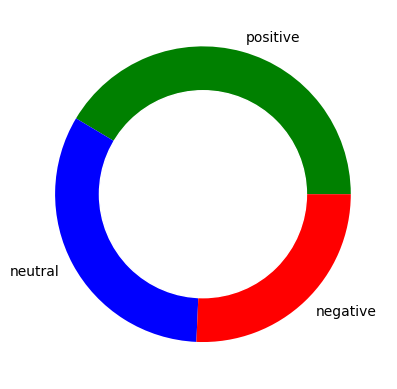

In [ ]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [ ]:
#Function to Create Wordcloud
def create_wordcloud(text):
 mask = np.array(Image.open("cloud.png"))
 stopwords = set(STOPWORDS)
 wc = WordCloud(background_color="white",
 mask = mask,
 max_words=3000,
 stopwords=stopwords,
 repeat=True)
 wc.generate(str(text))
 wc.to_file("wc.png")
 print("Word Cloud Saved Successfully")
 path="wc.png"
 display(Image.open(path))

Word Cloud Saved Successfully


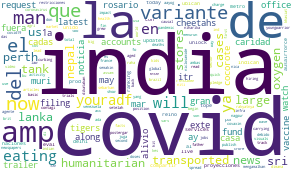

In [ ]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)

Word Cloud Saved Successfully


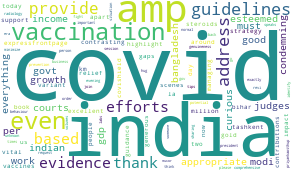

In [ ]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


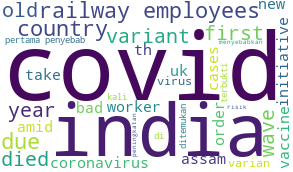

In [ ]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

In [ ]:
#Calculating tweet’s lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,110.50
neutral,103.35
positive,115.48


In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,18.72
neutral,17.91
positive,18.72


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#Removing Punctuation
def remove_punct(text):
 text = "".join([char for char in text if char not in string.punctuation])
 text = re.sub('[0–9]+', '', text)
 return text
tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @AdamPrabata: BAD NEWS!!\n\nVarian virus pe...,bad news varian virus penyebab covid b 1 61...,-0.700000,0.666667,negative,NaN,NaN,NaN,NaN,123,19,bad news varian virus penyebab covid b 1 61...,"[bad, news, varian, virus, penyebab, covid, b,...","[bad, news, varian, virus, penyebab, covid, b,...","[bad, news, varian, viru, penyebab, covid, b, ..."
1,#TreatRailwayEmployeesFrontlineWorkers\nIn thi...,treatrailwayemployeesfrontlineworkers in this...,-0.062500,0.587500,negative,NaN,NaN,NaN,NaN,118,14,treatrailwayemployeesfrontlineworkers in this...,"[, treatrailwayemployeesfrontlineworkers, in, ...","[, treatrailwayemployeesfrontlineworkers, crit...","[, treatrailwayemployeesfrontlinework, critic,..."
2,RT @yaneerbaryam: Why these 2 counties' COVID ...,why these 2 counties covid surges are among w...,-0.375000,0.666667,negative,NaN,NaN,NaN,NaN,122,22,why these 2 counties covid surges are among w...,"[why, these, 2, counties, covid, surges, are, ...","[2, counties, covid, surges, among, worst, cou...","[2, counti, covid, surg, among, worst, countri..."
3,RT @WSJ: A 26-year-old doctor died the same da...,a 26 year old doctor died the same day he was ...,0.066667,0.175000,negative,NaN,NaN,NaN,NaN,131,29,a 26 year old doctor died the same day he was ...,"[a, 26, year, old, doctor, died, the, same, da...","[26, year, old, doctor, died, day, diagnosed, ...","[26, year, old, doctor, die, day, diagnos, cov..."
4,RT @Ujjwal_Patni: Watch the Trailer now !!\nक्...,watch the trailer now ...,0.000000,0.000000,neutral,0.0,1.0,0.0,0.0,119,4,watch the trailer now ...,"[watch, the, trailer, now, ]","[watch, trailer, ]","[watch, trailer, ]"


In [ ]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())
#1281 Number of reviews has 2966 words
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

70 Number of reviews has 509 words


,,aayog,acc,accident,account,activ,ada,address,administ,advanc,again,age,agent,agri,al,aligarh,alivio,allow,along,amba,amid,among,amp,apart,appropri,around,arrang,articl,assam,ausairforc,australia,ay,b,back,bad,bangladesh,bar,base,basic,begin,...,undertaken,unido,unknown,unlock,updat,us,usa,use,vaccin,vacuna,varian,variant,variou,venezuela,via,video,viru,visual,vital,volum,w,want,war,warn,warrior,watch,wave,way,wear,week,work,worker,world,worri,worst,ya,yang,year,youngwarrior,youradf
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
covid,50
india,43
amp,12
la,11
vaccin,10
variant,9
de,7
case,5
countri,5
us,5


In [ ]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
 vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
 bag_of_words = vec.transform(corpus)
 sum_words = bag_of_words.sum(axis=0) 
 words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
 words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
 return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)
n2_bigrams

[('covid 19', 21),
 ('railway employees', 3),
 ('la variante', 3),
 ('di india', 2),
 ('year old', 2),
 ('india covid', 2),
 ('evidence based', 2),
 ('courts india', 2),
 ('india esteemed', 2),
 ('esteemed judges', 2),
 ('judges condemning', 2),
 ('condemning modi', 2),
 ('modi govt', 2),
 ('govt covid', 2),
 ('19 work', 2),
 ('man eating', 2),
 ('covid situation', 2),
 ('2nd wave', 2),
 ('youradf transported', 2),
 ('transported perth', 2)]

In [ ]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)
n3_trigrams

[('courts india esteemed', 2),
 ('india esteemed judges', 2),
 ('esteemed judges condemning', 2),
 ('judges condemning modi', 2),
 ('condemning modi govt', 2),
 ('modi govt covid', 2),
 ('govt covid 19', 2),
 ('covid 19 work', 2),
 ('youradf transported perth', 2),
 ('transported perth large', 2),
 ('perth large oxygen', 2),
 ('large oxygen tank', 2),
 ('oxygen tank india', 2),
 ('tank india amp', 2),
 ('india amp humanitarian', 2),
 ('amp humanitarian stores', 2),
 ('humanitarian stores nepal', 2),
 ('stores nepal amp', 2),
 ('nepal amp sri', 2),
 ('amp sri lanka', 2)]

## Analisis Data

In [ ]:
SentimentIntensityAnalyzer().polarity_scores('vaccine')

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [ ]:
SentimentIntensityAnalyzer().polarity_scores('support')

{'compound': 0.4019, 'neg': 0.0, 'neu': 0.0, 'pos': 1.0}

In [ ]:
SentimentIntensityAnalyzer().polarity_scores('died')

{'compound': -0.5574, 'neg': 1.0, 'neu': 0.0, 'pos': 0.0}

Melihat kondisi tersebut, kelompok kami memutuskan untuk mencari tahu bagaimana respon dari para pengguna twitter mengenai wabah disana. Kami akan menganalisa cuitan yang mereka buat menggunakan NLP seperti yang telah diajarkan oleh dosen pengampu.

Untuk mengetahui kata apa yang mengkategorikan suatu cuitan adalah sebagai berikut. Suatu cuitan dikategorikan sentiment netral jika mengandung kata-kata vaccine, report, dose. Suatu cuitan dikategorikan sentiment positive jika mengandung kata-kata support, effort. Suatu cuitan dikategorikan sentiment negative jika mengandung kata-kata died, bad dan variant.

# Tugas 03 - Reinforcement Learning
## Mask-Bot
"COVID-19 adalah penyakit yang disebabkan oleh virus corona jenis baru. 'CO' untuk korona, 'VI' untuk virus, dan 'D' untuk penyakit. Sebelumnya, penyakit ini disebut sebagai '2019 novel coronavirus' atau '2019-nCoV'.”  Dari referensi KOMPAS.com dengan judul artikel “Kilas Balik Kronologi Munculnya Kasus Pertama Covid-19 di Indonesia”, kasus COVID-19 yang muncul di Indonesia pada 2 Maret 2020. Pada masa-masa sebelum itu, Indonesia sudah mengalami panic buying atau “perilaku membeli kebutuhan dalam jumlah banyak karena takut akan suatu hal” . Tetapi, pada saat itu COVID-19 dirumorkan tidak akan masuk pada Indonesia, dikarenakan kalimat, “orang Indonesia kan kebal terhadap penyakit seperti itu”. Sampai sekarang pun, masih banyak orang-orang yang tidak mematuhi protokol kesehatan.


“Protokol Kesehatan”, orang Indonesia-pun banyak yang asing dengan frasa  tersebut. Memakai masker, mencuci tangan, menjauhi kerumunan, membatasi mobilitas. 5 hal tersebut merupakan protokol kesehatan untuk pencegahan penyebaran COVID-19 ini. Sebagai mahasiswa kecerdasan buatan, mengapa tidak mengusulkan  suatu hal untuk hal ini. Karena itu, laporan ini dibuat. Mask-Bot, sebuah nama yang tercipta dari pikiran yang terinspirasi dari sebuah video youtube. Dalam video tersebut, seseorang membuat kecerdasan buatan kepada Robodog buatan Boston Dynamics untuk melakukan suatu hal. Pada kali ini, laporan ini terinspirasi dari seseorang tersebut untuk menanamkan kecerdasan kepada robot. Contohnya, Robodog, yang harganya sangat mahal, bisa juga yang sedang tren, Drone, bisa juga membuat mobil remot kontrol yang memiliki kecerdasan buatan aga bisa berjalan sendiri. 


“Reinforcement Learning adalah subbidang pembelajaran mesin yang berkaitan dengan pengambilan keputusan dan kontrol motorik. Ini mempelajari bagaimana seorang agen dapat belajar bagaimana mencapai tujuan dalam lingkungan yang kompleks dan tidak pasti.”  Mask-Bot adalah sebuah robot yang ditanamkan atau diberikan kecerdasan agar bisa berjalan sendiri dan memiliki pengelihatan untuk memantau. Memantau orang-orang yang sedang keluar rumah, kita bisa mengaplikasikan reinforcement learning pada robot tersebut agar berjalan sendiri dan memantau orang-orang sekitar. Kita juga dapat mengaplikasinya topik-topik yang pernah dibahas dalam kelas. Seperti mencari orang yang tidak memakai masker, mengajarkan bagaimana orang mencuci tangan, sehingga dapat melihat orang yang selesai memegang sesuatu lalu tidak mencuci tangan, juga dapat menilai kepadatan kerumunan pada suatu titik. Sebetulnya, masih banyak yang bisa dilakukan, dan jika kecerdasan buatan makin berkembang, masih banyak hal-hal yang belum terpikirkan oleh kita sekarang ini.


### Referensi
1. Brockman, G. (2020, September 1). OpenAI Gym Beta. OpenAI. https://openai.com/blog/openai-gym-beta/. 
2. Key Messages and Actions for COVID-19 Prevention and ... (n.d.). https://www.who.int/docs/default-source/coronaviruse/key-messages-and-actions-for-covid-19-prevention-and-control-in-schools-march-2020.pdf?sfvrsn=baf81d52_4. 
3. Warta Ekonomi. (2020, April 13). Apa Itu Panic Buying? Warta Ekonomi. https://www.wartaekonomi.co.id/read280798/apa-itu-panic-buying. 
